In [1]:
import csv 
# java-0,javascrip-1,c#-2,php-3,android-4,jquery-5,c++-6,python-7,iphone-8,asp.net-9
def load_data(path):
    data_train = []
    label_train = []
    data_test = []
    label_test = []
    count=[0,0,0,0,0,0,0,0,0,0]
    with open(path) as in_file:
        reader = csv.DictReader(in_file)
        for row in reader:
            if 'java' in row['Tags']:
                if 'javascrip' not in row['Tags']:
                    if count[0] >13999   and count[0] < 20000:
                        data_test.append(row['Title'])
                        label_test.append(row['Tags'])
                        count[0] += 1
                    if count[0] < 14000:
                        data_train.append(row['Title'])
                        label_train.append(row['Tags'])
                        count[0] += 1
                else:
                    if count[1] > 13999 and count[1] < 20000:
                        data_test.append(row['Title'])
                        label_test.append(row['Tags'])
                        count[1] += 1
                    if count[1] < 14000:
                        data_train.append(row['Title'])
                        label_train.append(row['Tags'])
                        count[1] += 1
            elif 'c#' in row['Tags']:
                if count[2] > 13999 and count[2] < 20000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[2] += 1
                if count[2] < 14000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[2] += 1
            elif 'php' in row['Tags']:
                if count[3] > 13999 and count[3] < 20000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[3] += 1
                if count[3] < 14000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[3] += 1
            elif 'android' in row['Tags']:
                if count[4] > 13999 and count[4] < 20000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[4] += 1
                if count[4] < 14000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[4] += 1
            elif 'jquery' in row['Tags']:
                if count[5] > 13999 and count[5] < 20000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[5] += 1
                if count[5] < 14000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[5] += 1
            elif 'c++' in row['Tags']:
                if count[6] > 6999 and count[6] < 10000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[6] += 1
                if count[6] < 7000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[6] += 1
            elif 'python' in row['Tags']:
                if count[7] > 6999 and count[7] < 10000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[7] += 1
                if count[7] < 7000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[7] += 1
            elif 'iphone' in row['Tags']:
                if count[8] > 6999 and count[8] < 10000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[8] += 1
                if count[8] < 7000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[8] += 1
            elif 'asp.net' in row['Tags']:
                if count[9] > 6999 and count[9] < 10000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[9] += 1
                if count[9] < 7000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[9] += 1
    return data_train, label_train, data_test, label_test

(data_train, label_train, data_test, label_test) = load_data("Train_Title.csv")
print(len(data_train), len(label_train))
print(len(data_test),len(label_test))

112000 112000
48000 48000


In [2]:
def count_element(begin, end, token):
    k = 0
    for i in range(begin, end):
        if token in label_new_test[i]:
            k+= 1
    return k

def count_java(begin, end):
    k =0
    for i in range(begin, end):
        if 'java' in label_new_test[i]:
            if 'javascrip' not in label_new_test[i]:
                k+=1
    return k

In [3]:
print("1 "+label_test[0])
print("2 "+ label_test[3000])
print("3 "+label_test[9000])
print("4 "+label_test[15000])
print("5 "+label_test[21000])
print("6 "+label_test[27000])
print("7 "+label_test[33000])
print("8 "+label_test[39000])
print("9 "+label_test[42000])
print("10 "+label_test[45000])

1 c++

2 php

3 javascrip

4 java

5 android

6 jquery

7 c#

8 python

9 iphone

10 asp.net



In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words="english", lowercase=True)
data_train_count = count_vect.fit_transform(data_train)
print(data_train_count.shape)

(112000, 30222)


In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_tranformer = TfidfTransformer(norm='l2')
data_train_tfidf = tfidf_tranformer.fit_transform(data_train_count)
print(data_train_tfidf.shape)


(112000, 30222)


In [6]:
import numpy as np
data_test_counts = count_vect.transform(data_test)
data_test_tfidf = tfidf_tranformer.transform(data_test_counts)
print(data_test_tfidf.shape)

(48000, 30222)


In [7]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(data_train_tfidf, label_train)
label_new_test= clf.predict(data_test_tfidf)
print(np.mean(label_new_test == label_test))

0.521104166667


In [8]:
c_plus_plus = count_element(0, 3000, 'c++')
php = count_element(3000, 9000, 'php')
javascrip = count_element(9000, 15000, 'javascrip')
java = count_java(15000, 21000)
android = count_element(21000, 27000, 'android')
jquery = count_element(27000, 33000, 'jquery')
c_sharp = count_element(33000, 39000, 'c#')
python = count_element(39000, 42000, 'python')
iphone = count_element(42000, 45000, 'iphone')
asp_net = count_element(45000, 48000, 'asp.net')
Y_NB = np.array([c_plus_plus/3000, php/6000, javascrip/6000, java/6000, android/6000, jquery/6000, python/3000, iphone/3000, asp_net/3000])


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-15,shuffle=True, random_state=200))])

text_clf.fit(data_train, label_train)
label_new_test = text_clf.predict(data_test)
print(np.mean(label_new_test == label_test))

/home/robot/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.508604166667


In [10]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0, shuffle=True, random_state=300, learning_rate='constant', eta0=0.12)
clf.fit(data_train_tfidf, label_train)
label_new_test= clf.predict(data_test_tfidf)
print(np.mean(label_new_test == label_test))

/home/robot/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.579270833333


In [11]:
print(clf.intercept_)

[-0.9996 -1.1388 -0.9336 -1.0068 -1.0176 -0.9264 -1.1448 -1.164  -1.104
 -1.0044]


/home/robot/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


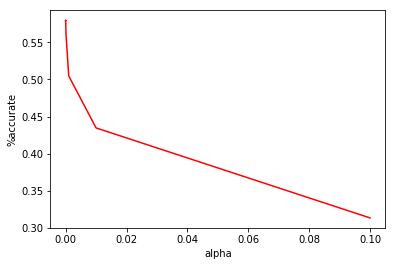

In [12]:
import matplotlib.pyplot as plt

def find_parameters(alpha_, eta_, random_state_):
    clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_, shuffle=True, random_state=random_state_, learning_rate='constant', eta0=eta_)
    clf.fit(data_train_tfidf, label_train)
    label_new_test= clf.predict(data_test_tfidf)
    return (np.mean(label_new_test == label_test))

alpha=[]
loss_alpha=[]
alpha.append(0)
loss_alpha.append(find_parameters(0.0, 0.12, 300))
alpha_ = 1e-15
for i in range(15):
    loss_alpha.append(find_parameters(alpha_, 0.12, 300))
    alpha.append(alpha_)
    alpha_ = alpha_*10

plt.plot(alpha, loss_alpha, 'r-')
plt.ylabel('%accurate')
plt.xlabel('alpha')
plt.show()


/home/robot/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


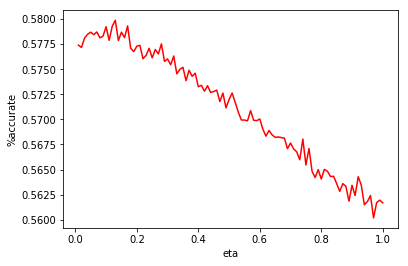

In [13]:
eta=[]
loss_eta=[]
eta_ = 0.01
for i in range(100):
    loss_eta.append(find_parameters(0, eta_, 300))
    eta.append(eta_)
    eta_ += 0.01

plt.plot(eta, loss_eta, 'r-')
plt.ylabel('%accurate')
plt.xlabel('eta')
plt.show()

/home/robot/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


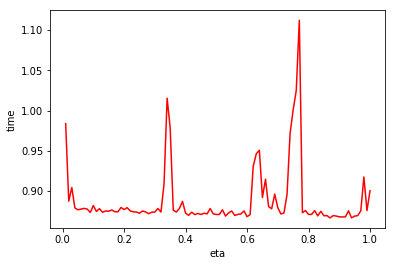

In [14]:
import timeit 
eta=[]
time_eta=[]
eta_ = 0.01
for i in range(100):
    start= timeit.default_timer()
    find_parameters(0, eta_, 300)
    stop= timeit.default_timer()
    time_eta.append((stop-start))
    eta.append(eta_)
    eta_ += 0.01

plt.plot(eta, time_eta, 'r-')
plt.ylabel('time')
plt.xlabel('eta')
plt.show()

/home/robot/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


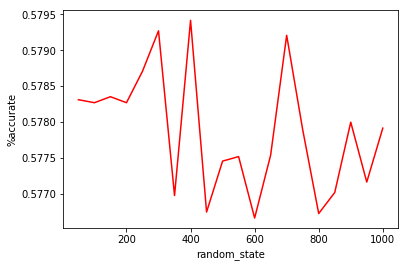

In [15]:
random_state=[]
loss_random_state=[]
random_state_ = 50
for i in range(20):
    loss_random_state.append(find_parameters(0, 0.12, random_state_))
    random_state.append(random_state_)
    random_state_ += 50

plt.plot(random_state, loss_random_state, 'r-')
plt.ylabel('%accurate')
plt.xlabel('random_state')
plt.show()

In [16]:
find_parameters(0, 0.12, 300)
c_plus_plus = count_element(0, 3000, 'c++')
php = count_element(3000, 9000, 'php')
javascrip = count_element(9000, 15000, 'javascrip')
java = count_java(15000, 21000)
android = count_element(21000, 27000, 'android')
jquery = count_element(27000, 33000, 'jquery')
c_sharp = count_element(33000, 39000, 'c#')
python = count_element(39000, 42000, 'python')
iphone = count_element(42000, 45000, 'iphone')
asp_net = count_element(45000, 48000, 'asp.net')

Y_SGD = np.array([c_plus_plus/3000, php/6000, javascrip/6000, java/6000, android/6000, jquery/6000, python/3000, iphone/3000, asp_net/3000])


/home/robot/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [17]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(usename='DemoAccount',apt_key='lr1c37zw81')
X = ['c++', 'php', 'javascrip', 'java', 'android', 'jquery', 'c#', 'python', 'iphone', 'asp.net']

trace1 = go.Bar(
    x = X,
    y = Y_NB,
    name = 'NB'
)

trace2 = go.Bar(
    x = X,
    y = Y_SGD,
    name = 'SGD'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data = data, layout=layout)
py.iplot(fig, filename='grouped-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~TinhChuQuang/0 or inside your plot.ly account where it is named 'grouped-bar'
